<a href="https://colab.research.google.com/github/RajNandani2701/RajNandani2701/blob/main/Zomato_project_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataframe=pd.read_csv("/content/Zomato data .csv")
dataframe


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [ ]:
#convert the data type of column -rate
def handlerate(value):
  value=str(value).split('/')
  value=value[0];
  return float(value)
dataframe['rate']=dataframe['rate'].apply(handlerate)
print(dataframe.head())







                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [ ]:
#type of restaurant
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of restaurant')

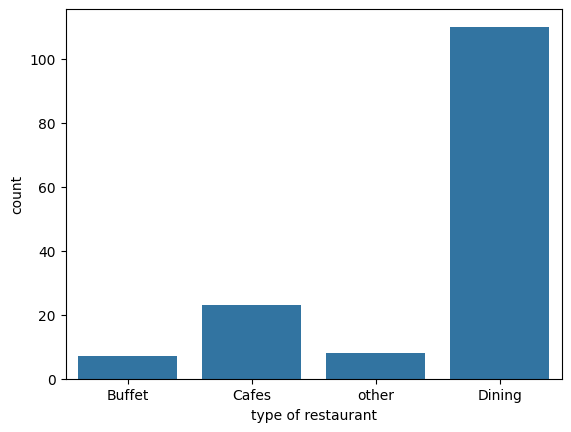

In [ ]:
sns.countplot(x=dataframe["listed_in(type)"])
plt.xlabel('type of restaurant')

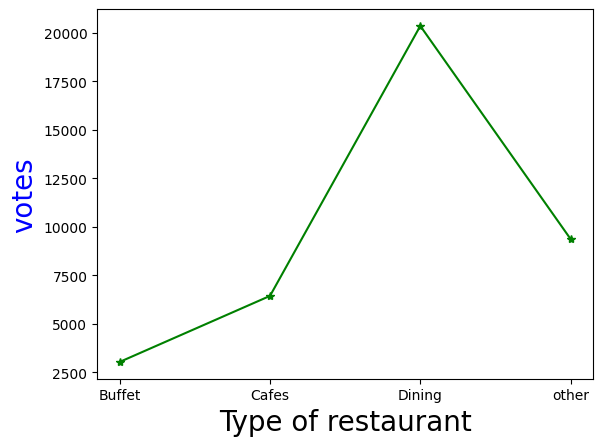

In [ ]:
grouped_data=dataframe.groupby(['listed_in(type)'])["votes"].sum()
result=pd.DataFrame({"votes":grouped_data})
plt.plot(result,c="green",marker="*")
plt.xlabel("Type of restaurant",c="black",size=20)
plt.ylabel("votes",c="blue",size=20)
plt.show()

conclusion -dining restaurant received maximum votes


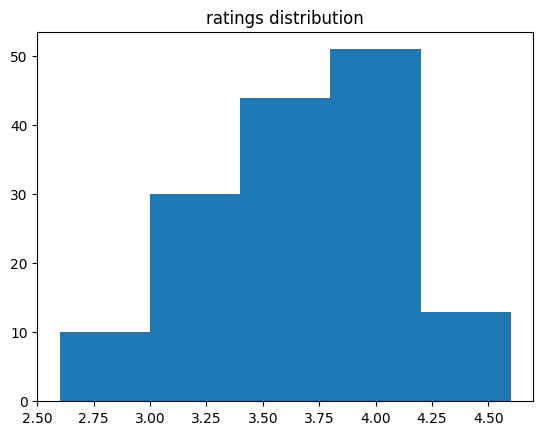

In [ ]:
#rating recieved??
plt.hist(dataframe['rate'],bins=5)
plt.title("ratings distribution")
plt.show()



conclusion:the majority retaurants received ratings from 3.5 to 4

In [ ]:
#Average orders spending by couples
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

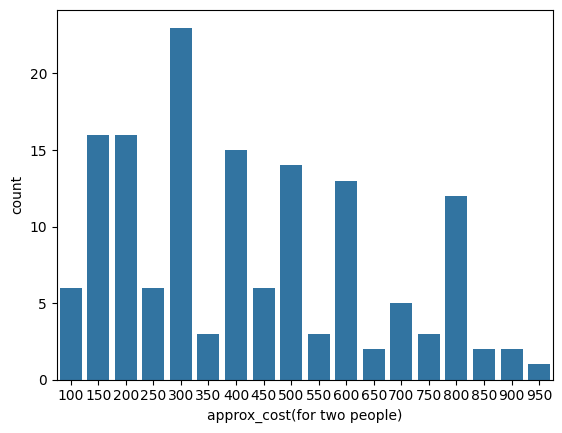

In [ ]:
couple_data=dataframe["approx_cost(for two people)"]
sns.countplot(x=couple_data)

conclusion :the majority of couple prefer restaurant with an approx cost of 300 rupees

In [ ]:
#Which mode receives maximum rating
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

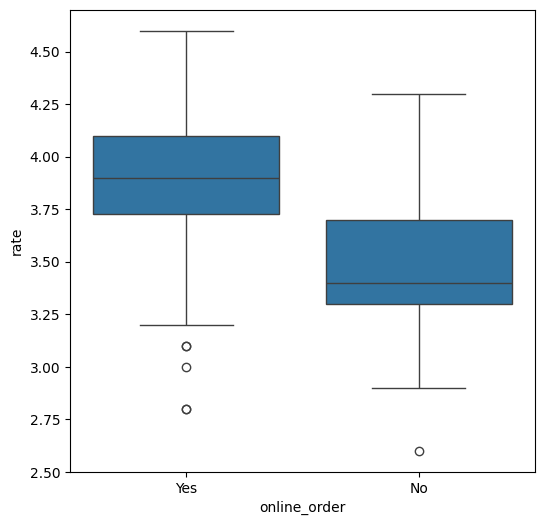

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order",y="rate",data=dataframe)

cocnclusion:offline order receives lower rating in comapre to online orders

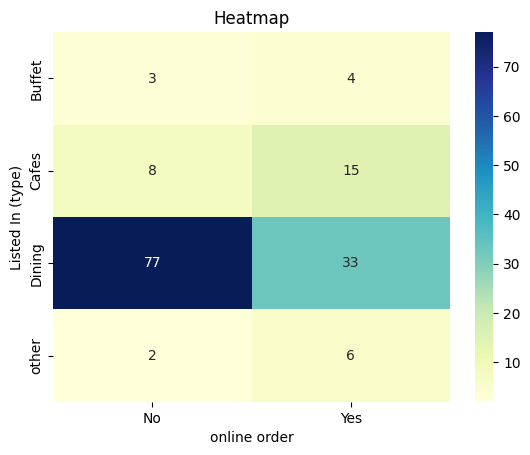

In [ ]:
pivot_table=dataframe.pivot_table(index="listed_in(type)",columns="online_order",aggfunc="size",fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt="d")
plt.title("Heatmap")
plt.xlabel("online order")
plt.ylabel("Listed In (type)")
plt.show()

conclusions:Dining restaurants primarily accept offline orders ,whereas cafes primarily receive online orders. this suggest that cilents prefres order in personal at restaurants ,but prefer online ordering at cafes
